Project 2 - Income Qualification (New)

DESCRIPTION

Identify the level of income qualification needed for the families in Latin America

# Problem Statement Scenario:
Many social programs have a hard time making sure the right people are given enough aid. It’s tricky when a program focuses on the poorest 

segment of the population. This segment of population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a 

model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their 

homes to classify them and predict their level of need. While this is an improvement, accuracy remains a problem as the region’s population 

grows and poverty declines.

The Inter-American Development Bank (IDB) believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican 

household characteristics, might help improve PMT’s performance.

# Following actions should be performed:
* Identify the output variable.
* Understand the type of data.
* Check if there are any biases in your dataset.
* Check whether all members of the house have the same poverty level.
* Check if there is a house without a family head.
* Set the poverty level of the members and the head of the house same in a family.
* Count how many null values are existing in columns.
* Remove null value rows of the target variable.
* Predict the accuracy using random forest classifier.
* Check the accuracy using a random forest with cross-validation.

In [1]:
import numpy as np
import pandas as pd

In [2]:
IQData=pd.read_csv(r'D:\SarojOfficeWork\AI\AI-From-Simplilearn\Modeule-2MachineLearning\Project for Submission\income_qualification\Dataset\train.csv')

In [3]:
IQData.info(max_cols=145)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 143 columns):
Id                 9557 non-null object
v2a1               2697 non-null float64
hacdor             9557 non-null int64
rooms              9557 non-null int64
hacapo             9557 non-null int64
v14a               9557 non-null int64
refrig             9557 non-null int64
v18q               9557 non-null int64
v18q1              2215 non-null float64
r4h1               9557 non-null int64
r4h2               9557 non-null int64
r4h3               9557 non-null int64
r4m1               9557 non-null int64
r4m2               9557 non-null int64
r4m3               9557 non-null int64
r4t1               9557 non-null int64
r4t2               9557 non-null int64
r4t3               9557 non-null int64
tamhog             9557 non-null int64
tamviv             9557 non-null int64
escolari           9557 non-null int64
rez_esc            1629 non-null float64
hhsize             9557 non

### EDA

In [4]:
# Out put variable column(label) is 'Target'. Its a classificaltion problem and possible classes are 1,2,3,4
# Total Columns=143, 138 Numeric, 5 Categorical
#Categorical columns are=[Id,idhogar,dependency, edjefe,edjefa ]
# Label is Numerical. We can convert it into catagorical 1=Class1,2=Class2,3=Class3,4=Class4
# 'idhogar' attribute is used to identify an unique household
# 'parentesco1' = 1: If the member is Head of the House

In [5]:
# Remove ID columns which does not contribute to model prediction
IQData.drop(columns=['Id'],inplace=True)

In [6]:
#We can convert the label(Target) from numeric to catagorical 1=Class1,2=Class2,3=Class3,4=Class4
IQData.Target.replace([1,2,3,4],['Class1','Class2','Class3','Class4'],inplace=True)

In [7]:
IQData.Target.value_counts()

Class4    5996
Class2    1597
Class3    1209
Class1     755
Name: Target, dtype: int64

In [8]:
#Check if there is a house without a family head. From below results its found that there are 15 such houses  
# Logic: 
# step-1:Collect all distinct houses. (Set1)
# step-2:Collect all houses where there is family head(Set2)
# step-3: Perform Set1 - Set2

houseWithoutHead=list(set(IQData.idhogar.values) - set(IQData[IQData.parentesco1 == 1]['idhogar'].values))
houseWithoutHead

['ad687ad89',
 'c0c8a5013',
 '374ca5a19',
 'a0812ef17',
 '1bc617b23',
 '6b1b2405f',
 'd363d9183',
 '03c6bdf85',
 'b1f4d89d7',
 'f2bfa75c4',
 '09b195e7a',
 '61c10e099',
 'bfd5067c2',
 '896fe6d3e',
 '1367ab31d']

In [9]:
#sample Data for house without a family head
IQData[IQData.idhogar.isin(houseWithoutHead)][['idhogar','parentesco1','age']]


idhogar  parentesco1  age
304   03c6bdf85            0   11
305   03c6bdf85            0    9
556   09b195e7a            0   34
932   1367ab31d            0   19
1233  1bc617b23            0   12
2194  374ca5a19            0   10
3664  61c10e099            0   20
4086  6b1b2405f            0   14
4087  6b1b2405f            0   32
4088  6b1b2405f            0   43
5159  896fe6d3e            0   16
5955  a0812ef17            0   17
6481  ad687ad89            0   16
6641  b1f4d89d7            0   22
7181  bfd5067c2            0   13
7182  bfd5067c2            0    7
7218  c0c8a5013            0    8
7219  c0c8a5013            0   10
7220  c0c8a5013            0   17
7868  d363d9183            0   32
8983  f2bfa75c4            0    9
8984  f2bfa75c4            0   10
8985  f2bfa75c4            0   11

In [10]:
# We can update parentesco1=1 for the above houses where Age >18 and Age is maxmum in case of multiple members


In [11]:
#for i in list([4086,4087,4088]):
for i in np.arange(len(IQData)):
    if IQData.loc[i,'idhogar'] in houseWithoutHead:
        if IQData.loc[i,'age'] > 18:
            print('for family: ',IQData.loc[i,'idhogar'], 'Member Age is:',IQData.loc[i,'age'],'Family Head: ',IQData.loc[i,'parentesco1'])
            # We can update the value to 1
            IQData.loc[i,'parentesco1']=1
    

for family:  09b195e7a Member Age is: 34 Family Head:  0
for family:  1367ab31d Member Age is: 19 Family Head:  0
for family:  61c10e099 Member Age is: 20 Family Head:  0
for family:  6b1b2405f Member Age is: 32 Family Head:  0
for family:  6b1b2405f Member Age is: 43 Family Head:  0
for family:  b1f4d89d7 Member Age is: 22 Family Head:  0
for family:  d363d9183 Member Age is: 32 Family Head:  0


In [12]:
IQData[(IQData.idhogar=='6b1b2405f') & (IQData.age==32)].index
IQData.loc[4087,'parentesco1']=0

In [13]:
#Set the poverty level of the members and the head of the house same in a family
# Lets assume the poverty level attributes are: column index from 22 to 73.
# Below code can be enhanced to update the columns based Head of family member columns values

#for i in list(IQData[IQData.parentesco1==1].index):
    #vara,varb,varc,house_no........=IQData[IQData.parentesco1==1].loc[i,['A','B','C',.............'idhogar']]
    #idx_loc=list(data[data.House==house_no].loc[:,['A','B','C'..........]].index)
    #data.loc[idx_loc,['A','B','C'........]]=vara,varb,varc,.............

In [14]:
#Below code is a test code to check whether its possible to update one records based on another records.
#Objective is to make the attribure values of Head of the house to rest of his family member
data=pd.DataFrame(np.random.randint(10,100,18).reshape(6,3),columns=['A','B','C'])
data['House']=pd.DataFrame(['abc','abc','xyz','xyz','mno','mno'])
data['Head']=pd.DataFrame(['H','M','H','M','H','M'])
data

A   B   C House Head
0  78  40  66   abc    H
1  13  18  77   abc    M
2  99  79  48   xyz    H
3  51  93  96   xyz    M
4  72  80  72   mno    H
5  56  17  12   mno    M

In [15]:
#for i in np.arange(len(data[data.Head=='H'])):
for i in list(data[data.Head=='H'].index):
    #vara,varb,varc,house_no=data[data.Head=='H'].iloc[i,[0,1,2,3]]
    vara,varb,varc,house_no=data[data.Head=='H'].loc[i,['A','B','C','House']]
    idx_loc=list(data[data.House==house_no].loc[:,['A','B','C']].index)
    data.loc[idx_loc,['A','B','C']]=vara,varb,varc
    
data


A   B   C House Head
0  78  40  66   abc    H
1  78  40  66   abc    M
2  99  79  48   xyz    H
3  99  79  48   xyz    M
4  72  80  72   mno    H
5  72  80  72   mno    M

In [16]:
# Check for Null Values of Target column
IQData[IQData.Target.isna()==True]

Empty DataFrame
Columns: [v2a1, hacdor, rooms, hacapo, v14a, refrig, v18q, v18q1, r4h1, r4h2, r4h3, r4m1, r4m2, r4m3, r4t1, r4t2, r4t3, tamhog, tamviv, escolari, rez_esc, hhsize, paredblolad, paredzocalo, paredpreb, pareddes, paredmad, paredzinc, paredfibras, paredother, pisomoscer, pisocemento, pisoother, pisonatur, pisonotiene, pisomadera, techozinc, techoentrepiso, techocane, techootro, cielorazo, abastaguadentro, abastaguafuera, abastaguano, public, planpri, noelec, coopele, sanitario1, sanitario2, sanitario3, sanitario5, sanitario6, energcocinar1, energcocinar2, energcocinar3, energcocinar4, elimbasu1, elimbasu2, elimbasu3, elimbasu4, elimbasu5, elimbasu6, epared1, epared2, epared3, etecho1, etecho2, etecho3, eviv1, eviv2, eviv3, dis, male, female, estadocivil1, estadocivil2, estadocivil3, estadocivil4, estadocivil5, estadocivil6, estadocivil7, parentesco1, parentesco2, parentesco3, parentesco4, parentesco5, parentesco6, parentesco7, parentesco8, parentesco9, parentesco10, parentesco11, parentesco12, idhogar, hogar_nin, hogar_adul, hogar_mayor, hogar_total, dependency, ...]
Index: []

[0 rows x 142 columns]

### Handling of Categorical columns
#Categorical columns are=[Id,idhogar,dependency, edjefe,edjefa ]

In [17]:
# Handling of categorical column: dependency 

In [18]:
IQData.dependency.unique()

array(['yes', '2', 'no', '8', '0.5', '0.66666669', '0.75', '1.5', '0.2',
       '3', '0.33333334', '1.3333334', '3.5', '0.40000001', '0.71428573',
       '2.5', '0.25', '1.6666666', '4', '5', '1.25', '0.83333331', '1.2',
       '0.2857143', '0.16666667', '0.22222222', '0.60000002',
       '0.80000001', '1.75', '6', '2.25'], dtype=object)

In [19]:
IQData.dependency.replace(['yes','no'],[np.nan,np.nan],inplace=True)

In [20]:
# convert the datatype to to_numeric for the column dependency
IQData['dependency']=IQData.dependency.apply(pd.to_numeric)

In [21]:
IQData.dependency.fillna(IQData.dependency.mean(),inplace=True)

In [22]:
IQData.dependency.mean()

1.5653709487201384

In [23]:
IQData.dependency.unique()

array([1.56537095, 2.        , 8.        , 0.5       , 0.66666669,
       0.75      , 1.5       , 0.2       , 3.        , 0.33333334,
       1.3333334 , 3.5       , 0.40000001, 0.71428573, 2.5       ,
       0.25      , 1.6666666 , 4.        , 5.        , 1.25      ,
       0.83333331, 1.2       , 0.2857143 , 0.16666667, 0.22222222,
       0.60000002, 0.80000001, 1.75      , 6.        , 2.25      ])

In [24]:
# Handling of categorical column edjefe
IQData.edjefe.unique()
IQData.edjefe.replace(['no','yes'],[0,1],inplace=True)
IQData['edjefe']=IQData.edjefe.apply(pd.to_numeric)

In [25]:
# Handling of  categorical column edjefa
IQData.edjefa.unique()
IQData.edjefa.value_counts()
IQData.edjefa.replace(['no','yes'],[0,1],inplace=True)
IQData['edjefa']=IQData.edjefa.apply(pd.to_numeric)

In [26]:
#Handling of idhogar categorical col. 
#Since this is a kind of House identifier columns, this does not add any value to model prediction. This can be dropped.
IQData.drop(columns='idhogar',inplace=True)

In [27]:
# Count how many null values are in the columns.
pd.set_option('display.max_rows',150)
IQData.isna().sum()

v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1              7342
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
paredother            0
pisomoscer            0
pisocemento           0
pisoother             0
pisonatur             0
pisonotiene           0
pisomadera            0
techozinc             0
techoentrepiso        0
techocane             0
techootro             0
cielorazo             0
abastaguadentro 

### Analysis of Null value columns

In [28]:
#Total number of records in Dataset=9557
# Null values for v2a1               =6860  = 72% Null Values. Monthly rent payment. This column can be dropped. 
IQData.drop(columns='v2a1',inplace=True)
# Null values for v18q1              =7342  = 77% Null Values. number of tablets household owns. we can make substitute 0 in place of Null
IQData.v18q1.replace(np.nan,0,inplace=True)
# Null values for rez_esc            =7928  = 83% Null Values. Years behind in school. This column can be dropped.
IQData.drop(columns='rez_esc',inplace=True)
# Null values for SQBmeaned         =  5    = Negligible. This can be imputed.Missing value can be substituted with mean.
#   SQBmeaned=square of the mean years of education of adults (>=18) in the household
IQData.SQBmeaned.fillna(IQData.SQBmeaned.mean(),inplace=True)
# Null values for meaneduc         =  5  Negligible. This can be imputed.Missing value can be substituted with mean
IQData.meaneduc.fillna(IQData.mean(),inplace=True)

In [29]:
IQData.meaneduc.fillna(IQData.meaneduc.mean(),inplace=True)

In [30]:
# Lets now check how many columns are having null values. 
IQData.isna().sum().sum()
# No Null Values...Good.

0

### Important!!!! The columns dropped so far from the dataset:  ID, idhogar , v2a1 and rez_esc

### Lets check if any Outliers in the Data

In [34]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [35]:
# Which columns to target??

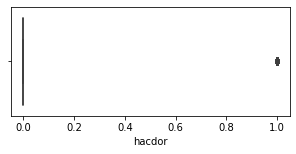

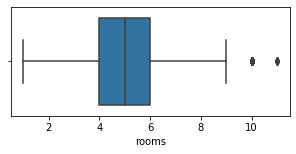

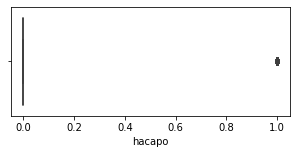

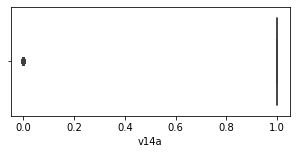

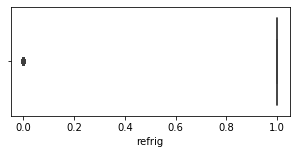

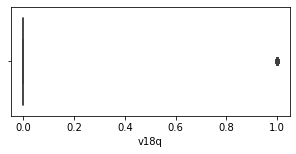

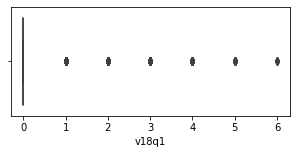

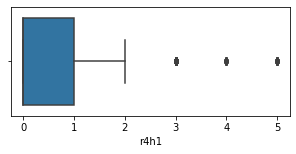

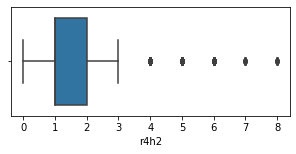

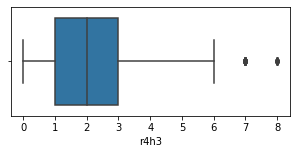

In [36]:
#sns.boxplot(IQData.rooms). We can plot the chart in phases for selcted columns

column_list=list(IQData.columns)
for i in np.arange(0,10):
    plt.figure(figsize=(5,2))
    column_name=column_list[i]
    sns.boxplot(IQData[column_name])
    
    plt.show()

In [31]:
### Lets Extract Features
features=IQData.drop(columns='Target').values
features.shape

(9557, 138)

In [32]:
### Lets Extract label
label=IQData.Target.values
label.shape

(9557,)

In [33]:
### Apply Stanard scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features=sc.fit_transform(features)

In [34]:
## Apply PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=138) # lets include all features initially
pca.fit(features,label)
pca.explained_variance_ratio_ > np.mean(pca.explained_variance_ratio_)
# We can choose 50 Principal components and fit the model again

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [35]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09913172, 0.1685425 , 0.20789204, 0.24021091, 0.26767602,
       0.29343586, 0.3163659 , 0.33742769, 0.35736087, 0.37476961,
       0.39166928, 0.40694285, 0.42170478, 0.43621539, 0.45018508,
       0.46295035, 0.47513093, 0.48696001, 0.49856405, 0.51000516,
       0.52086957, 0.5314049 , 0.54183616, 0.55192037, 0.56186095,
       0.57153064, 0.58105339, 0.59019739, 0.59923994, 0.6082231 ,
       0.61707842, 0.62574327, 0.63429775, 0.64272544, 0.65109167,
       0.65936252, 0.66752494, 0.67559334, 0.68352448, 0.69135593,
       0.69917042, 0.70692186, 0.71461331, 0.72219487, 0.72976917,
       0.73719735, 0.74461258, 0.75200351, 0.75935751, 0.76667793,
       0.77392325, 0.78115298, 0.78827178, 0.79530405, 0.80224612,
       0.80912461, 0.81592313, 0.82269487, 0.82944467, 0.83615552,
       0.84270114, 0.84915395, 0.85552036, 0.86178582, 0.86802174,
       0.87419405, 0.88033997, 0.88632789, 0.89216842, 0.89789326,
       0.90344359, 0.9089236 , 0.91435239, 0.91968367, 0.92481

In [36]:
pca=PCA(n_components=50) 
pca.fit(features,label)
finalFeatures=pca.transform(features)

In [37]:
finalFeatures.shape

(9557, 50)

In [38]:
label.shape

(9557,)

### Lets try cross validation and estimate what could be the best score using random forest classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier()


In [70]:
# Perform Cross Validation
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
#for i in np.arange(2,16):
    
score=cross_val_score(modelRFC,finalFeatures,label,cv=15)
print('the best score we can get using Cross validation Is:{} for CV: {}'.format(np.mean(score),15))


the best score we can get using Cross validation Is:0.6107636821079321 for CV: 15


In [71]:
#StratifiedShuffleSplit
#How to extract the best training and testing sample that can give the best score with control over test_size parameter
# KFold Cross Validation

#1. Initialize the algo
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier()

#2. Initialize StratifiedShuffleSplit Method
from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(n_splits=15, #n_splits should be equal to no of cv value in cross_val_score
              random_state=1,
              test_size=0.2)

#3. Initialize For Loop 

i=0
for train,test in ss.split(finalFeatures,label):
    i = i+1
    #X_train,X_test = finalFeatures[train],finalFeatures[test]
    #y_train,y_test = label[train],label[test]
    X_train,X_test,y_train,y_test = finalFeatures[train],finalFeatures[test],label[train],label[test]
    modelRFC.fit(X_train,y_train)
    test_score=modelRFC.score(X_test,y_test)
    train_score=modelRFC.score(X_train,y_train)
    
    if test_score >= 0.70:
        print("Test Score: {}, train score: {}, for Sample Split: {}".format(test_score,train_score,i))
      
    #if modelRFC.score(X_test,y_test) >= 0.70:
        #print("Test Score: {}, train score: {}, for Sample Split: {}".format(modelRFC.score(X_test,y_test),modelRFC.score(X_train,y_train),i))
      


Test Score: 0.7243723849372385, train score: 0.9916285153695226, for Sample Split: 1
Test Score: 0.7118200836820083, train score: 0.993198168737737, for Sample Split: 2
Test Score: 0.702928870292887, train score: 0.9937213865271419, for Sample Split: 3
Test Score: 0.7186192468619247, train score: 0.9922825376062786, for Sample Split: 4
Test Score: 0.7170502092050209, train score: 0.9942446043165467, for Sample Split: 5
Test Score: 0.7092050209205021, train score: 0.9934597776324395, for Sample Split: 6
Test Score: 0.7201882845188284, train score: 0.992544146500981, for Sample Split: 7
Test Score: 0.7097280334728033, train score: 0.995029431000654, for Sample Split: 8
Test Score: 0.7076359832635983, train score: 0.9941137998691956, for Sample Split: 9
Test Score: 0.7003138075313807, train score: 0.9924133420536299, for Sample Split: 10
Test Score: 0.7039748953974896, train score: 0.9924133420536299, for Sample Split: 11
Test Score: 0.7248953974895398, train score: 0.9937213865271419, fo

In [72]:
#Now extract the training and testing sample for sample Split postion=12
ss=StratifiedShuffleSplit(n_splits=15,test_size=0.2,random_state=1)
i=0
for train,test in ss.split(finalFeatures,label):
    i=1+1
    if i==12:
        X_train,X_test,y_train,y_test=finalFeatures[train],finalFeatures[test],label[train],label[test]


In [78]:
# Now lets fit the model onceagain with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier()
modelRFC.fit(X_train,y_train)
train_score=modelRFC.score(X_train,y_train)
test_score=modelRFC.score(X_test,y_test)
print('Test Score is: {} Train Score is: {}'.format(test_score,train_score) )

Test Score is: 0.7212343096234309 Train Score is: 0.9945062132112492


In [79]:
# But since the data is imbalanced: we need to check the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=label,y_pred=modelRFC.predict(finalFeatures))
cm


array([[ 656,   29,    4,   66],
       [   8, 1390,   17,  182],
       [   6,   24, 1032,  147],
       [  11,   54,   27, 5904]], dtype=int64)

In [80]:
# Get Precesion and Recall from ClassificationReport
from sklearn.metrics import classification_report
print(classification_report(y_true=label,y_pred=modelRFC.predict(finalFeatures)))

              precision    recall  f1-score   support

      Class1       0.96      0.87      0.91       755
      Class2       0.93      0.87      0.90      1597
      Class3       0.96      0.85      0.90      1209
      Class4       0.94      0.98      0.96      5996

    accuracy                           0.94      9557
   macro avg       0.95      0.89      0.92      9557
weighted avg       0.94      0.94      0.94      9557



### Now lets Predict the accuracy using random forest classifier without Cross validation

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
    
X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=10)
modelRFC=RandomForestClassifier()
modelRFC.fit(X_train,y_train)
train_score=modelRFC.score(X_train,y_train)
test_score=modelRFC.score(X_test,y_test)
print('test score is {} Train score is {}'.format(test_score,train_score))

test score is 0.7201882845188284 Train score is 0.9924133420536299


In [84]:
# Since there is no generalized model( Test score is less than train score) for random state 10, lets try to see for other random sampling 
#if we can get a generalized model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

for i in np.arange(1,50):
    X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
    modelRFC=RandomForestClassifier()
    modelRFC.fit(X_train,y_train)
    train_score=modelRFC.score(X_train,y_train)
    test_score=modelRFC.score(X_test,y_test)
    
    if test_score > train_score:
        print('test score is {} Train score is {} for random state: {}'.format(test_score,train_score,i))

### Still we dont have a generalized model

In [85]:
# Lets try decesion tree classifier and check
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
for i in np.arange(1,50):
    X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
    modelDT=DecisionTreeClassifier()
    modelDT.fit(X_train,y_train)
    train_score=modelDT.score(X_train,y_train)
    test_score=modelDT.score(X_test,y_test)
    
    if test_score > train_score:
        print('test score is {} Train score is {} for random state: {}'.format(test_score,train_score,i))

In [101]:
# Lets try logistic Regression and check if we can get a generalized model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
for i in np.arange(1,100):
    X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
    modelLR=LogisticRegression()
    modelLR.fit(X_train,y_train)
    train_score=modelLR.score(X_train,y_train)
    test_score=modelLR.score(X_test,y_test)
    
    if ((test_score > train_score) & (test_score >0.68)):
    #if (test_score > train_score):
        print('test score is {} Train score is {} for random state: {}'.format(test_score,train_score,i))

test score is 0.6856694560669456 Train score is 0.6616088947024199 for random state: 81


### Great we have now got a generalized model with Logistic regression

In [102]:
# Lets try to fit the model with random state=81
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

modelLR=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=81)
modelLR.fit(X_train,y_train)
print('test score is: ',modelLR.score(X_test,y_test))
print('train score is: ',modelLR.score(X_train,y_train))


test score is:  0.6856694560669456
train score is:  0.6616088947024199


In [107]:
### How Can we improve the score now. Lets apply Cross validation and StratifiedShuffle Split 
#to see if we can get a better score
from sklearn.model_selection import cross_val_score
cs=cross_val_score(modelLR,finalFeatures,label,cv=8)
#for i in (np.arange(2,16)):
    #cs=cross_val_score(modelLR,finalFeatures,label,cv=i)
    #print('cross val score is: {} for CV= {}'.format(np.mean(cs),i))
print('cross val score is: {} for CV= {}'.format(np.mean(cs),8))

cross val score is: 0.6472685442625274 for CV= 8


In [113]:
## Lets apply StratifiedShuffle Split to get the best sample and score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
ss=StratifiedShuffleSplit(n_splits=8,test_size=0.2,random_state=1)
i=0
for train,test in ss.split(finalFeatures,label):
    i=i+1
    X_train,X_test,y_train,y_test=finalFeatures[train],finalFeatures[test],label[train],label[test]
    modelLR.fit(X_train,y_train)
    train_score=modelLR.score(X_train,y_train)
    test_score=modelLR.score(X_test,y_test)
    if test_score>train_score:
        print('test score is: {} train score is {} for split {}'.format(test_score,train_score,i))

test score is: 0.674163179916318 train score is 0.6618705035971223 for split 1
test score is: 0.6731171548117155 train score is 0.6680183126226291 for split 5


In [114]:
## Not much of improvement with Cross validation in Logistic regression.
## Conclusion So far: The best model is still Logistic regresison with Random sampling with random state=81:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

modelLR=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=81)
modelLR.fit(X_train,y_train)
print('test score is: ',modelLR.score(X_test,y_test))
print('train score is: ',modelLR.score(X_train,y_train))

test score is:  0.6856694560669456
train score is:  0.6616088947024199


In [115]:
# lets check confusion matrix and classificatin report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(label,modelLR.predict(finalFeatures))
cm

array([[ 129,  280,    1,  345],
       [  66,  538,   14,  979],
       [  16,  226,   11,  956],
       [  23,  251,   31, 5691]], dtype=int64)

In [116]:
print(classification_report(label,modelLR.predict(finalFeatures)))

              precision    recall  f1-score   support

      Class1       0.55      0.17      0.26       755
      Class2       0.42      0.34      0.37      1597
      Class3       0.19      0.01      0.02      1209
      Class4       0.71      0.95      0.81      5996

    accuracy                           0.67      9557
   macro avg       0.47      0.37      0.37      9557
weighted avg       0.59      0.67      0.60      9557



### It seems that there are lot of misclassification still. How can we improve ?
## Can we improve using XGBoost?